In [4]:
%env DRAKE_RESOURCE_ROOT = '/drake/share'

env: DRAKE_RESOURCE_ROOT='/drake/share'


In [3]:
import sys
sys.path.append('/Users/lawrenceli/Documents/mit/6832/project/underactuated/src')
sys.path.append('/Users/lawrenceli/Documents/mit/6832/project/drake-env/lib/python2.7/site-packages/')

Let's first try the controller's trajectory optimization method for the passive compass gait in steady state, as a sanity check.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'pydrake.symbolic.Expression'>
<class 'pydrake.symbolic.Expression'>
2
2
2


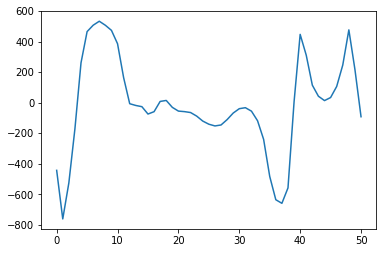

In [38]:
%load_ext autoreload
%autoreload 2

from compass_gait_sim import ComputeTrajectory
import numpy as np

# steady state conditions    
state_initial = np.array([-0.219, 0.324, 1.093, 0.376])
state_final = np.array([0.324, -0.219, 1.496, 1.81])
min_time = 1
max_time = 50

states, u, time_step = ComputeTrajectory(state_initial, state_final, min_time, max_time)

import matplotlib.pyplot as plt
plt.plot(u)


In [21]:
print(state_log.data())

[[ 0.00000000e+00  4.00000028e-05  2.40000602e-04 ...  7.29498575e+00
   7.30462333e+00  7.30471904e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  9.99999999e-01  9.99999971e-01 ...  5.87534613e-01
   5.89388710e-01  5.89406632e-01]
 ...
 [ 0.00000000e+00  4.00000084e-01  4.00003022e-01 ...  1.00891612e+00
   9.73944102e-01  9.73595927e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.39999972e+00 -2.39999005e+00 ... -8.94734278e-01
  -9.73691089e-01 -9.74491120e-01]]


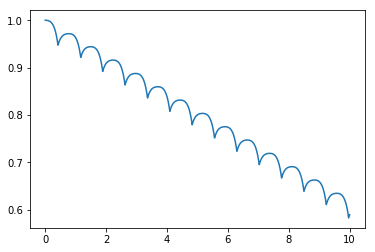

In [10]:
import matplotlib.pyplot as plt
plt.plot(state_log.sample_times(), state_log.data()[2, :])

In [5]:
from IPython.display import HTML
import matplotlib.pyplot as plt
ani = viz.animate(state_log, 10, repeat=True)
plt.close(viz.fig)
HTML(ani.to_html5_video())

In [32]:
tree = RigidBodyTree(FindResourceOrThrow(
                        "drake/examples/compass_gait/CompassGait.urdf"),
                     FloatingBaseType.kRollPitchYaw)
params = CompassGaitParams()
print(params)

[10, 5, 1, 0.5, 9.81, 0.0525]


In [18]:
%system python compass_gait.py

['/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure',
 '  "matplotlib is currently using a non-GUI backend, "',
 "Warning: DrakeShapes::Cylinder::getPoints(): This method returns the vertices of the cylinder''s bounding-box.",
 'compass_gait.py:54: DrakeDeprecationWarning: Use SetAccuracy() instead. Will be removed on or after 2019-07-01.',
 '    Please see `help(pydrake.common.deprecation)` for more information.',
 '  context.set_accuracy(1e-4)',
 'Figure(1280x640)']

In [15]:
%tb

SystemExit: 2

In [9]:
CompassGait.mro()

[pydrake.examples.compass_gait.CompassGait,
 pydrake.systems.framework.LeafSystem_[float],
 pydrake.systems.framework.System_[float],
 pybind11_builtins.pybind11_object,
 object]